# 지도학습 - 분류
#### 자주 사용하는 사이킷런 모듈
- sklearn.ensemble: 앙상블 알고리즘(RF, AdaBoost 등)
- sklearn.linear_model: 선형모델(선형회귀, 로지스틱회귀 등) 
- sklearn.svm: Support Vector Machines (SVM)
- sklearn.tree: 의사결정나무(Decision Trees)
- sklearn.neighbors : K-최근접이웃모델 (KNeighbors)

#### 사이킷런 기반 머신러닝 프레임워크    
- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 **Classifier**로, 회귀 알고리즘을 구현한 클래스를 **Regressor**로 지칭
    - Ex) DecisionTreeClassifier(분류문제에 사용하는 의사결정나무) vs. DecisionTreeRegressor(회귀문제에 사용하는 의사결정나무)
- Classifier와 Regressor를 합쳐서 **Estimator** 클래스라고 함
    - ML 학습을 위해 fit()을, 예측을 위해 predict()를 제공  

# import library

In [72]:
import pandas as pd 
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 모델 알고리즘
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 데이터 셋
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 정규화, 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 검증
from sklearn.metrics import accuracy_score


## Data Load
- iris data
    - 꽃의 특성 (feature) 데이터 
        - [‘sepal length (cm)’, ‘sepal width (cm)’, ‘petal length (cm)’, ‘petal width (cm)’]    
            - sepal: 꽃받침 / petal: 꽃잎
    - target(y)는 세 가지의 꽃의 종류
        - 0: Setosa, 1: Versicolor, 2: Virginica
              

In [2]:
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns = iris_data.feature_names)
iris_df['target'] = iris_data.target

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### data & target

In [3]:
data = iris_df.iloc[:,:-1]
target = iris_df['target']

### train & test data 분리 

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 22)

#test_size 0.2 의미 : train : test=8:2

In [5]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
30,4.8,3.1,1.6,0.2
31,5.4,3.4,1.5,0.4
89,5.5,2.5,4.0,1.3
90,5.5,2.6,4.4,1.2
55,5.7,2.8,4.5,1.3
...,...,...,...,...
102,7.1,3.0,5.9,2.1
100,6.3,3.3,6.0,2.5
44,5.1,3.8,1.9,0.4
132,6.4,2.8,5.6,2.2


In [6]:
X_train.shape


(120, 4)

# 의사결정나무 (Decision Tree) 

### 모델 객체화

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 111, criterion = 'entropy')

- 내가 설정한 대로 성능이 바뀌는 것을 하이퍼 파라미터라고 한다. (max_depth , n_estimators ... ) 

### 모델 학습

In [8]:
dt.fit(X_train, y_train)
#fit :학습 시킨다

DecisionTreeClassifier(criterion='entropy', random_state=111)

- 머신러닝의 3단계
    - 1) 모델의 객체화 
    - 2) 모델 학습
    - 3) 모델 적용 (예측 & 분류)

- sklearn에서 제공하는 Decision Tree 순수도의 척도는 엔트로피 외에도 지니 지수가 있다. (기본값이 gini이기에 criterion을 정해주지 않으면 지니 지수로 순수도를 계산하게 된다.) 

- criterion 외에도 의사결정나무에는 수 많은 하이퍼 파라미터가 존재한다. 하이퍼 파라미터를 튜닝하는 것 자체로도 성능이 향상될 수 있다. 

### 모델 평가

In [9]:
from sklearn.metrics import accuracy_score, classification_report

pred = dt.predict(X_test)
accuracy_score(pred, y_test)
# dt.score(X = X_test, y = y_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.71      1.00      0.83        10
           2       1.00      0.71      0.83        14

    accuracy                           0.87        30
   macro avg       0.90      0.90      0.89        30
weighted avg       0.90      0.87      0.87        30



### 시각화

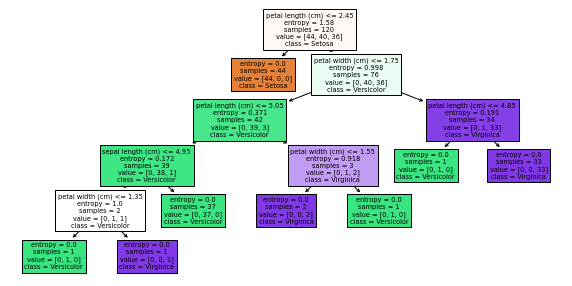

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,5))
plot_tree(dt, filled=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=X_train.columns)
plt.show()

- plottree : decision tree를 graph로 시각화 해주는 패키지 
    - filled :  그래프의 class별로 색의 차이를 둠. (엔트로피 별 농도 차이 존재) 

-  마지막 노드에서 entropy 0.0을 출력한다. 이는 완벽하게 분리시켰다고 말할 수 도 있지만, 사실 억지로 분류시킨 것에 가깝다. 그렇기에 과적합(Overfitting)발생 의심. 

## 가지치기 

- max_depth를 이용하여 최대 깊이를 조절한다. (가지치기) 

In [22]:
dt_pruning = DecisionTreeClassifier(random_state= 2022, max_depth = 3)

In [23]:
dt_pruning.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2022)

In [24]:
# dt_pruning.score(X = X_test, y = y_test)
pred = dt_pruning.predict(X_test)
accuracy_score(pred, y_test)

0.9

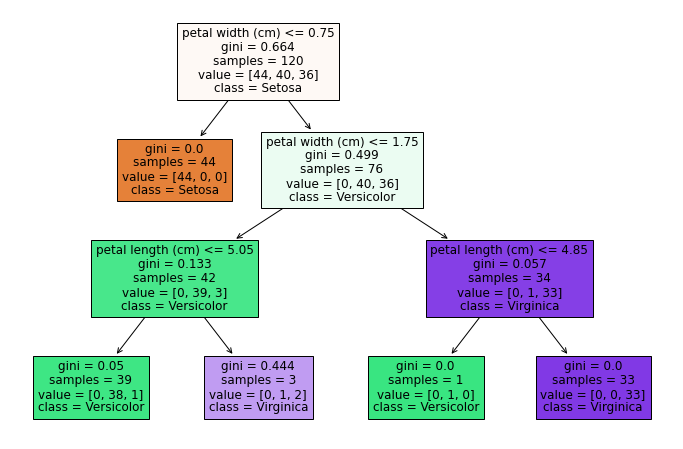

In [25]:
plt.figure(figsize=(12,8))
plot_tree(dt_pruning, filled=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=X_train.columns)
plt.show()

- depth가 1일 경우 정확도가 확 낮아진다. 이처럼 depth가 무조건 작다고 좋은 것은 아님. 최적의 depth를 구해내야함. 

- iris 데이터셋의 경우 데이터의 양도 적고 애초에 depth가 깊지 않기 때문에 정확도의 차이가 발생하지 않는다. 

- iris 데이터 외에도 다른 데이터 셋을 이용하여 max_depth를 조절해보길 바란다. 
 

# SVM

- 분류 : SVC
- 회귀 : SVR

### 데이터 분할

In [26]:
X_train = iris_df.iloc[:, :2]
y_train = iris_df['target']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 20)

### 2차원

##### kernel = 'linear'

###### C = 0.1, 1, 1000

In [28]:
from sklearn import svm

svm_01 = svm.SVC(kernel = 'linear', C = 0.1)
svm_01.fit(X_train, y_train)
pred = svm_01.predict(X_test)
accuracy_score(pred, y_test)

0.7

In [29]:
svm_1 = svm.SVC(kernel = 'linear', C= 1)
svm_1.fit(X_train, y_train)
pred = svm_1.predict(X_test)
accuracy_score(pred, y_test)

0.7333333333333333

In [30]:
svm_1000 = svm.SVC(kernel = 'linear', C= 1000)
svm_1000.fit(X_train, y_train)
pred = svm_1000.predict(X_test)
accuracy_score(pred, y_test)

0.7666666666666667

## 시각화

In [31]:
x_min, x_max=X_train.iloc[:,0].min()-1, X_train.iloc[:,0].max()+1
y_min, y_max=X_train.iloc[:,1].min()-1,X_train.iloc[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

In [32]:
print(xx,yy)
print(xx.shape, yy.shape)
# 격자의 좌표 

[[3.4   3.425 3.45  ... 8.825 8.85  8.875]
 [3.4   3.425 3.45  ... 8.825 8.85  8.875]
 [3.4   3.425 3.45  ... 8.825 8.85  8.875]
 ...
 [3.4   3.425 3.45  ... 8.825 8.85  8.875]
 [3.4   3.425 3.45  ... 8.825 8.85  8.875]
 [3.4   3.425 3.45  ... 8.825 8.85  8.875]] [[1.    1.    1.    ... 1.    1.    1.   ]
 [1.025 1.025 1.025 ... 1.025 1.025 1.025]
 [1.05  1.05  1.05  ... 1.05  1.05  1.05 ]
 ...
 [5.325 5.325 5.325 ... 5.325 5.325 5.325]
 [5.35  5.35  5.35  ... 5.35  5.35  5.35 ]
 [5.375 5.375 5.375 ... 5.375 5.375 5.375]]
(176, 220) (176, 220)


- meshgrid : 직사각형의 그리드 (격자) 안에 배치 될 수 있도록 하는 함수
- x_min-1 ~ x_max+1 / y_min-1 ~ y_max+1 사이에서 0.25 간격마다 그리드(격자) 생성

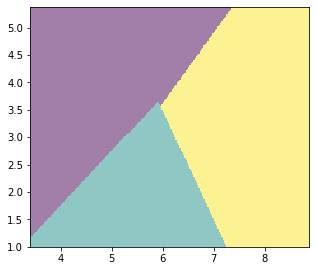

In [33]:
plt.figure(figsize = (5,15))
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)

ax1 = plt.subplot(3,1,1)
plt.pcolormesh(xx,yy,z_1,alpha=0.5)
# plt.pcolormesh() : 2D스타일의 색상 플롯 생성, alpha = 색상의 농도
plt.show()

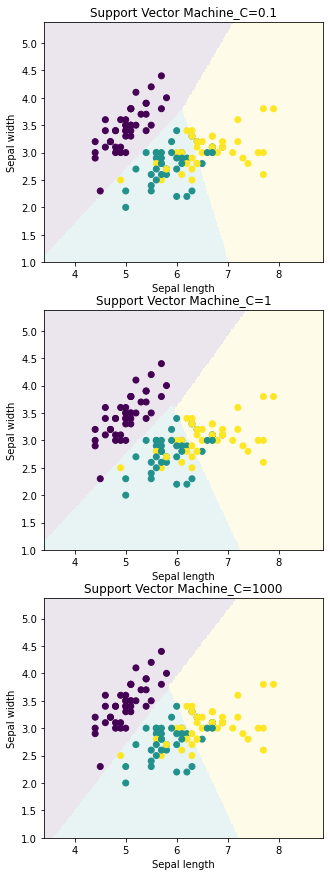

In [34]:
plt.figure(figsize = (5,15))

# C = 0.1

# 초평면을 만드는 과정
# np.c_[] : 같은 크기의 두 배열을 가로방향(왼쪽 -> 오른쪽)으로 합쳐줌
z_01=svm_01.predict(np.c_[xx.ravel(), yy.ravel()])
z_01=z_01.reshape(xx.shape)

ax1 = plt.subplot(3,1,1)
plt.pcolormesh(xx,yy,z_01,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=0.1')

# C = 1
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)
ax2 = plt.subplot(3,1,2, sharex = ax1)
plt.pcolormesh(xx,yy,z_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1')

# C = 1000
z_1000=svm_1000.predict(np.c_[xx.ravel(), yy.ravel()])
z_1000=z_1000.reshape(xx.shape)
ax3 = plt.subplot(3,1,3, sharex = ax1)
plt.pcolormesh(xx,yy,z_1000,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1000')


plt.show()

- C가 클수록 hardmargin (초평면이 빡빡하게 형성)

##### kernel = 'polynomial'

###### C = 0.001, 1, 1000

In [35]:
svm_0001 = svm.SVC(kernel = 'poly', C = 0.001)
svm_0001.fit(X_train, y_train)
pred = svm_0001.predict(X_test)
accuracy_score(pred, y_test)

0.6666666666666666

In [37]:
svm_1 = svm.SVC(kernel = 'poly', C = 1)
svm_1.fit(X_train, y_train)
pred = svm_1.predict(X_test)
accuracy_score(pred, y_test)

0.7

In [38]:
svm_1000 = svm.SVC(kernel = 'poly', C = 1000)
svm_1000.fit(X_train, y_train)
pred = svm_1000.predict(X_test)
accuracy_score(pred, y_test)

0.7333333333333333

In [39]:
x_min, x_max=X_train.iloc[:,0].min()-1, X_train.iloc[:,0].max()+1
y_min, y_max=X_train.iloc[:,1].min()-1,X_train.iloc[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

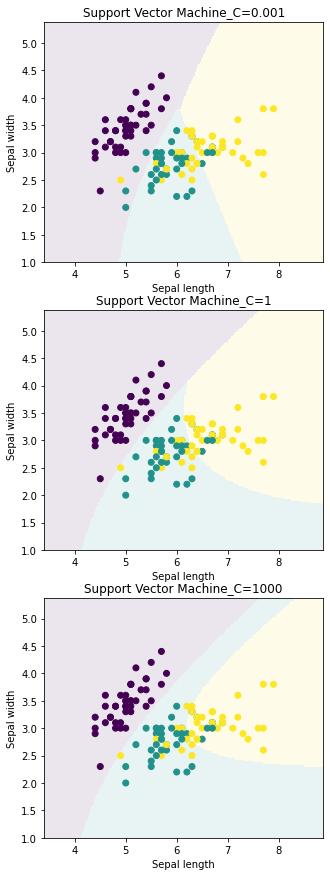

In [40]:
plt.figure(figsize = (5,15))

# C = 0.001
z_0001=svm_0001.predict(np.c_[xx.ravel(), yy.ravel()])
z_0001=z_0001.reshape(xx.shape)
ax1 = plt.subplot(3,1,1)
plt.pcolormesh(xx,yy,z_0001,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=0.001')

# C = 1
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)
ax2 = plt.subplot(3,1,2, sharex = ax1)
plt.pcolormesh(xx,yy,z_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1')

# C = 1000
z_1000=svm_1000.predict(np.c_[xx.ravel(), yy.ravel()])
z_1000=z_1000.reshape(xx.shape)
ax3 = plt.subplot(3,1,3, sharex = ax1)
plt.pcolormesh(xx,yy,z_1000,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1000')


plt.show()

##### C에 따른 정확도 

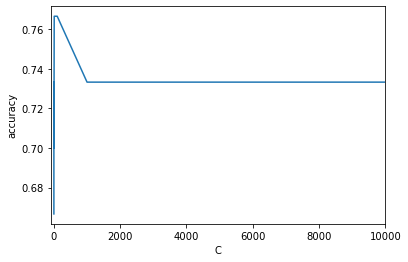

In [41]:
C = [0.001,0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy = []
from sklearn import svm
for c in C:
    svm_c = svm.SVC(kernel = 'poly', C = c)
    svm_c.fit(X_train, y_train)
    pred = svm_c.predict(X_test)
    scores = accuracy_score(pred, y_test)
    accuracy.append(scores)
    
plt.plot(C, accuracy)
plt.xlabel('C')
plt.xlim(-100, 10000)
plt.ylabel('accuracy')
plt.show()

### kernel = 'rbf'

###### C =  0.1, 1, 100 
###### gamma = 1, 10 , 100

In [42]:
svm1_1 = svm.SVC(kernel = 'rbf', C =1 , gamma = 1)
svm1_1.fit(X_train, y_train)
pred = svm1_1.predict(X_test)
accuracy_score(pred, y_test)

0.7666666666666667

In [43]:
svm1_10 = svm.SVC(kernel = 'rbf', C =1, gamma = 10)
svm1_10.fit(X_train, y_train)
pred = svm1_10.predict(X_test)
accuracy_score(pred, y_test)

0.7333333333333333

In [44]:
svm1_100 = svm.SVC(kernel = 'rbf', C =1, gamma = 100)
svm1_100.fit(X_train, y_train)
pred = svm1_100.predict(X_test)
accuracy_score(pred, y_test)

0.6666666666666666

In [45]:
svm_01 = svm.SVC(kernel = 'rbf', C = 0.1, gamma = 'auto')
svm_01.fit(X_train, y_train)
pred = svm_01.predict(X_test)
accuracy_score(pred, y_test)


0.7

In [46]:
svm_1 = svm.SVC(kernel = 'rbf', C = 1, gamma = 'auto')
svm_1.fit(X_train, y_train)
pred = svm_1.predict(X_test)
accuracy_score(pred, y_test)

0.7333333333333333

In [47]:
svm_100 = svm.SVC(kernel = 'rbf', C = 100, gamma = 'auto')
svm_100.fit(X_train, y_train)
pred = svm_100.predict(X_test)
accuracy_score(pred, y_test)

0.7

In [48]:
x_min, x_max=X_train.iloc[:,0].min()-1, X_train.iloc[:,0].max()+1
y_min, y_max=X_train.iloc[:,1].min()-1,X_train.iloc[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

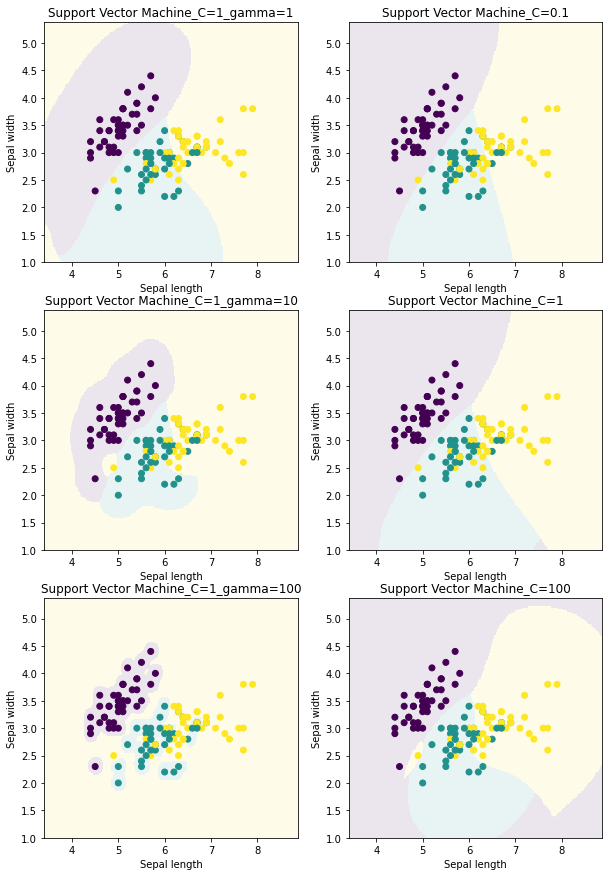

In [50]:
plt.figure(figsize = (10,15))

# C = 1, gamma = 1 
z_1_1=svm1_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1_1=z_1_1.reshape(xx.shape)
ax1 = plt.subplot(3,2,1)
plt.pcolormesh(xx,yy,z_1_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1_gamma=1')

# C = 1, gamma = 10
z_1_10=svm1_10.predict(np.c_[xx.ravel(), yy.ravel()])
z_1_10=z_1_10.reshape(xx.shape)
ax2 = plt.subplot(3,2,3, sharex = ax1)
plt.pcolormesh(xx,yy,z_1_10,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1_gamma=10')

# C = 1, gamma = 1000
z_1_100=svm1_100.predict(np.c_[xx.ravel(), yy.ravel()])
z_1_100=z_1_100.reshape(xx.shape)
ax3 = plt.subplot(3,2,5, sharex = ax1)
plt.pcolormesh(xx,yy,z_1_100,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1_gamma=100')

# C = 0.1
z_01=svm_01.predict(np.c_[xx.ravel(), yy.ravel()])
z_01=z_01.reshape(xx.shape)
ax4 = plt.subplot(3,2,2, sharey = ax1)
plt.pcolormesh(xx,yy,z_01,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=0.1')

# C = 1
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)
ax5 = plt.subplot(3,2,4, sharey = ax1)
plt.pcolormesh(xx,yy,z_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1')

# C = 100
z_100=svm_100.predict(np.c_[xx.ravel(), yy.ravel()])
z_100=z_100.reshape(xx.shape)
ax6 = plt.subplot(3,2,6, sharey = ax1)
plt.pcolormesh(xx,yy,z_100,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=100')

plt.show()

### 4차원 ( 시각화 불가능 )

In [51]:
data=iris_df.iloc[:, :-1]
target=iris_df['target']

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state= 111)

In [53]:
svm_linear = svm.SVC(kernel = 'linear', C = 1)
svm_linear.fit(X_train, y_train)
pred = svm_linear.predict(X_test)
accuracy_score(pred, y_test)

0.9666666666666667

- 2차원일 때 같은 조건 하 정확도가 0.8 

In [54]:
svm_poly = svm.SVC(kernel = 'poly', C = 1)
svm_poly.fit(X_train, y_train)
pred = svm_poly.predict(X_test)
accuracy_score(pred, y_test)

0.9

- kernel 이나 C 같은 하이퍼파라미터는 튜닝을 거쳐 가장 좋은 성능을 띄는 모델을 찾아야 함 -> 하이퍼파라미터 튜닝

# KNN

- iris 데이터의 경우 feature의 단위가 cm로 통일되어 있기 때문에 유방암 진단 데이터셋 이용

### 유방암 진단 데이터 

In [55]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

breast_cancer_df = pd.DataFrame(data = breast_cancer_data.data, columns = breast_cancer_data.feature_names)
breast_cancer_df['target'] = breast_cancer_data.target

data = breast_cancer_df.iloc[:,:-1]
target = breast_cancer_df['target']

In [56]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [57]:
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [58]:
data.iloc[:,3:10].describe()
# mean area 과 다른 column 들의 max, min, mean 등 차이 큰 것 확인 

,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


- 음성 / 양성 구분짓는 이진분류

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state= 111)

### 분류 정확도

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
accuracy_score(pred, y_test)




0.9385964912280702

### 정규화, 표준화

##### 표준화

In [61]:
from sklearn.preprocessing import StandardScaler

X_train_standard = X_train.copy()
X_test_standard = X_test.copy()

scaler = StandardScaler()

cols = X_train.columns

X_train_standard[cols] = scaler.fit_transform(X_train_standard[cols]) 
X_test_standard[cols] = scaler.transform(X_test_standard[cols])


In [63]:
print(X_train.iloc[5,:5].head()) 
print(X_train_standard.iloc[5,:5].head())

mean radius          18.25000
mean texture         19.98000
mean perimeter      119.60000
mean area          1040.00000
mean smoothness       0.09463
Name: 6, dtype: float64
mean radius        1.162394
mean texture       0.130090
mean perimeter     1.127570
mean area          1.076217
mean smoothness   -0.124583
Name: 6, dtype: float64


In [64]:
print(X_train.iloc[5,:5].describe())
print(X_train_standard.iloc[5,:5].describe())

count       5.000000
mean      239.584926
std       449.897696
min         0.094630
25%        18.250000
50%        19.980000
75%       119.600000
max      1040.000000
Name: 6, dtype: float64
count    5.000000
mean     0.674338
std      0.620404
min     -0.124583
25%      0.130090
50%      1.076217
75%      1.127570
max      1.162394
Name: 6, dtype: float64


In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_standard, y_train)

pred = knn.predict(X_test_standard)
accuracy_score(pred, y_test)


0.9824561403508771

- 정규화 거치지 않았을 경우 0.93

### 정규화

In [67]:
from sklearn.preprocessing import MinMaxScaler

X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()

scaler = MinMaxScaler()

cols = X_train.columns

X_train_minmax[cols] = scaler.fit_transform(X_train_minmax[cols])
X_test_minmax[cols] = scaler.transform(X_test_minmax[cols])

In [68]:
print(X_train_minmax.iloc[5,:5].head())
print(X_train_minmax.iloc[:,:5].describe())

mean radius        0.533343
mean texture       0.324230
mean perimeter     0.523875
mean area          0.380276
mean smoothness    0.379164
Name: 6, dtype: float64
       mean radius  mean texture  mean perimeter   mean area  mean smoothness
count   455.000000    455.000000      455.000000  455.000000       455.000000
mean      0.337041      0.304392        0.331673    0.216471         0.394836
std       0.169063      0.152662        0.170645    0.152372         0.125937
min       0.000000      0.000000        0.000000    0.000000         0.000000
25%       0.220976      0.196254        0.213738    0.115440         0.307529
50%       0.298121      0.286415        0.290927    0.170392         0.395685
75%       0.415732      0.388130        0.415382    0.270753         0.476393
max       1.000000      1.000000        1.000000    1.000000         1.000000


In [69]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_minmax, y_train)
 
pred = knn.predict(X_test_minmax)

accuracy_score(pred, y_test)

0.9736842105263158

- 정규화 거치기 이전 0.93

### k 변화에 의한 accuracy 변화

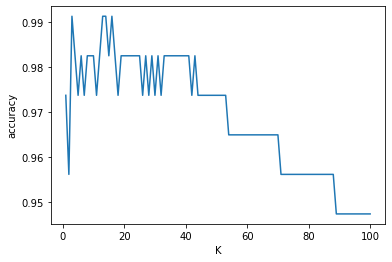

In [70]:
k_list = range(1,101)
accuracy = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_minmax, y_train)
    pred = knn.predict(X_test_minmax)
    score = accuracy_score(pred, y_test)
    accuracy.append(score)
    
plt.plot(k_list, accuracy)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.show()

- K가 커질수록 정확도가 하락한든 우하향 그래프
- 적정한 K를 구해야함 (하이퍼파라미터 튜닝) 

- 지금까지 설명드린 모델들은 간단한 분류를 위한 모델일 뿐입니다. 어떤 모델이 더 효과가 좋은지, 어떤 특성의 데이터에 어떤 모델을 써야하는 지와 하이퍼파라미터 튜닝하는 과정은 직접 프로젝트나 실습을 통해 비교해보고, 경험해보는 방향을 거치시는게 좋습니다. 

# 지도학습(분류) 과제

### SVC, 의사결정나무, KNN을 모델만 변경해서 분류 보고서를 출력해주세요. - 80점

In [71]:
import pandas as pd

# SVC 불러오기 
from sklearn.___ import ___
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'sklearn.___'

In [ ]:
# 데이터 불러오기 
# breast_cancer 데이터 사용합니다. 

breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data = ______, columns = ________)

In [ ]:
# target 설정
breast_cancer_df['target'] = ________

data = breast_cancer_df.iloc[__,___]
target = breast_cancer_df['target']

print(data)
print(target)

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(____, _____, test_size=0.2, random_state=42)

In [ ]:
# SVM 모델 생성
model = SVC(kernel='____', C=____, gamma=____)

In [ ]:
# 모델 훈련
model.____(X_train, y_train)

In [ ]:
# 예측
y_pred = model.____(X_test)

In [ ]:
# 분류 보고서 출력 (분석 보고서 출력을 하는 코드는 classification_report입니다.)
report = classification_report(y_test, y_pred)
print(report)

### 최종 제출은 아래와 같이 classfication_report만 도출되도록 해주시면 됩니다. 

### svc

In [ ]:
# SVC 불러오기 
from sklearn.___ import ___
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터 불러오기 
# breast_cancer 데이터 사용합니다. 

breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data = ______, columns = ________)

# target 설정
breast_cancer_df['target'] = ________

data = breast_cancer_df.iloc[__,___]
target = breast_cancer_df['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(____, _____, test_size=0.2, random_state=42)

# SVM 모델 생성
model = SVC(kernel='____', C=____, gamma=____)

# 모델 훈련
model.____(X_train, y_train)

# 예측
y_pred = model.____(X_test)

# 분류 보고서 출력 (분석 보고서 출력을 하는 코드는 classification_report입니다.)
report = classification_report(y_test, y_pred)
print(report)


### knn

In [ ]:
# knn 불러오기 
from sklearn.___ import ___
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data = ______, columns = ________)

# target 설정
breast_cancer_df['target'] = ________

data = breast_cancer_df.iloc[__,___]
target = breast_cancer_df['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(____, _____, test_size=0.2, random_state=42)




# 이전 부분은 동일하니 위에서 복붙하셔도 됩니다. 




############################################################

# KNN 모델 생성
model = ____(*hyperparameter)

# 모델 훈련
model.____(X_train, y_train)

# 예측
y_pred = model.____(X_test)

# 분류 보고서 출력 (분석 보고서 출력을 하는 코드는 classification_report입니다.)
report = classification_report(y_test, y_pred)
print(report)

### decision tree

In [75]:
# decision tree 불러오기 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data = breast_cancer_data.data, columns = breast_cancer_data.feature_names)
# target 설정
breast_cancer_df['target'] =breast_cancer_data.target

data = breast_cancer_df.iloc[:,:-1]
target = breast_cancer_df['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)



# 이전 부분은 동일하니 위에서 복붙하셔도 됩니다. 



############################################################

# decision tree 모델 생성 (decision tree의 경우에 실습 영상에 나온 것 보다 많은 하이퍼파라미터가 있으니 궁금하신 분들은 구글에 검색해보시는 것을 추천드립니다.)
model = DecisionTreeClassifier(random_state = 111, criterion = 'entropy')

# 모델 훈련
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 분류 보고서 출력 (분석 보고서 출력을 하는 코드는 classification_report입니다.)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114




### 추가로 다른 분류 기법 검색 후에 분류 보고서 제출하시면 추가점수 드리겠습니다. - 20점  (RandomForest -10점, Gradient Boosting - 10점)
- 모델을 적용하는 과정은 다 똑같으시니 랜덤포레스트, 그레디언트부스팅을 구글에 검색 후 
    - 1. 라이브러리 이름
    - 2. 모델 이름
    - 3. 하이퍼파라미터 
- 세 가지 종류를 확인해주시며 됩니다. 

#### RandomForest

In [76]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data = breast_cancer_data.data, columns = breast_cancer_data.feature_names)
# target 설정
breast_cancer_df['target'] =breast_cancer_data.target

data = breast_cancer_df.iloc[:,:-1]
target = breast_cancer_df['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

############################################################
# random forest 모델 생성
model = RandomForestClassifier(random_state = 100, criterion = 'entropy')

# 모델 훈련
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 분류 보고서 출력 (분석 보고서 출력을 하는 코드는 classification_report입니다.)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data = breast_cancer_data.data, columns = breast_cancer_data.feature_names)
breast_cancer_df['target'] =breast_cancer_data.target

data = breast_cancer_df.iloc[:,:-1]
target = breast_cancer_df['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

############################################################
# Gradient Boosting 모델 생성
model = GradientBoostingClassifier(random_state=0, max_depth=1)

# 모델 훈련
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 분류 보고서 출력 
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

